
Test Case 1: Normal distribution
p=95%: Lower bound = -1.8673, Upper bound = 1.9647
Actual percentage within bounds: 95.20%
p=99%: Lower bound = -2.4716, Upper bound = 2.5734
Actual percentage within bounds: 99.20%
p=50%: Lower bound = -0.6506, Upper bound = 0.6487
Actual percentage within bounds: 50.20%

Test Case 2: Uniform distribution
p=95%: Lower bound = -4.7003, Upper bound = 4.7680
Actual percentage within bounds: 95.20%
p=99%: Lower bound = -4.9424, Upper bound = 4.9633
Actual percentage within bounds: 99.20%
p=50%: Lower bound = -2.5290, Upper bound = 2.4807
Actual percentage within bounds: 50.20%

Test Case 3: Skewed distribution (exponential)
p=95%: Lower bound = 0.0310, Upper bound = 6.9179
Actual percentage within bounds: 95.20%
p=99%: Lower bound = 0.0031, Upper bound = 9.8720
Actual percentage within bounds: 99.20%
p=50%: Lower bound = 0.5841, Upper bound = 2.6843
Actual percentage within bounds: 50.20%

Test Case 4: Small dataset
p=80%: Lower bound = 1.0000, Upper boun

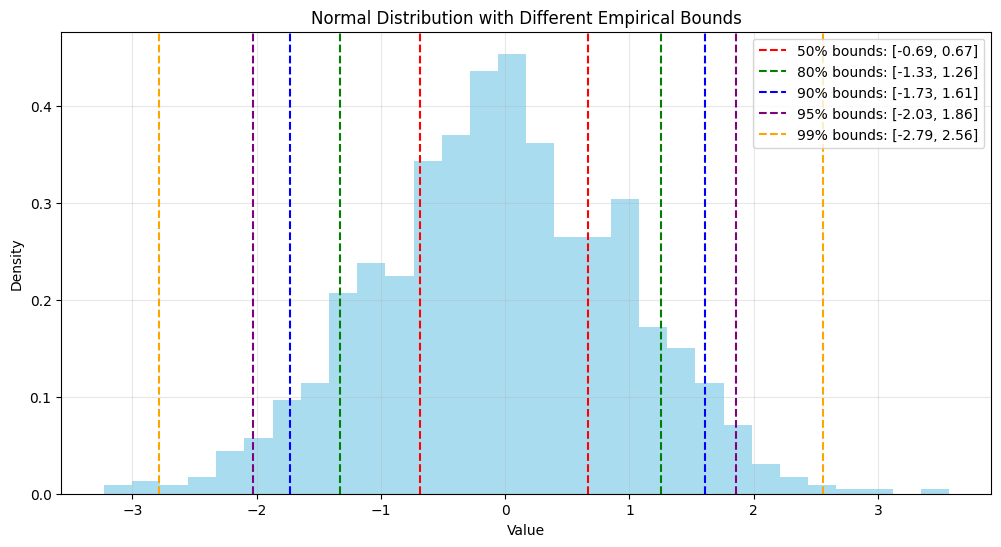


Test Case 7: Edge cases handling
Tiny dataset (p=50%): Lower bound = 1, Upper bound = 2
Minimum p (0.01%): Lower bound = 0.0210, Upper bound = 0.0269
Maximum p (99.99%): Lower bound = -3.2413, Upper bound = 3.8527
Successfully caught invalid p value > 99.99
Successfully caught invalid p value < 0.01


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the empirical bounds function
# Uncomment and use this if the function is in a separate file:
# from your_module import empiricalSampleBounds

# Copy of the function for testing purposes
def empiricalSampleBounds(data, p):
    """
    Computes the empirical bounds of a distribution/sample based on the probability mass.

    Parameters:
    -----------
    data : array-like
        One-dimensional array of numerical values representing a dataset/distribution/sample.
    p : float
        Probability mass bounds that define the center of the distribution (0.01 to 99.99).
        E.g., p=95 means we want the bounds that contain the central 95% of the data,
        with 2.5% in each tail.

    Returns:
    --------
    tuple
        (lower_bound, upper_bound) - The values where the left and right tails start.

    Notes:
    ------
    - The function sorts the data and finds the values at the appropriate percentiles.
    - If p=95, then the lower bound is at the 2.5th percentile and upper bound at the 97.5th percentile.

    Author: Claude
    Date: May 4, 2025
    """
    # Input validation
    if not isinstance(data, (list, np.ndarray, pd.Series)):
        raise TypeError("Data must be a list, numpy array, or pandas Series")

    # Convert to numpy array for consistent processing
    data = np.asarray(data)

    if len(data) == 0:
        raise ValueError("Data array cannot be empty")

    if not (0.01 <= p <= 99.99):
        raise ValueError("Probability mass must be between 0.01 and 99.99")

    # Sort the data in ascending order
    ascend = np.sort(data)

    # Length of the array
    N = len(ascend)

    # One percentile corresponds with this many datapoints, unrounded
    onep = N / 100

    # Probability mass in each tail
    tail = (100 - p) / 2

    # Each tail should contain this many datapoints
    N_tail = int(tail * onep)

    # Handle edge cases with small datasets
    if N_tail < 1:
        N_tail = 1
    if N_tail > N // 2:
        N_tail = N // 2

    # Lower bound (ensuring we don't go out of bounds)
    lb_index = max(0, N_tail - 1)
    lb = ascend[lb_index]

    # Upper bound (ensuring we don't go out of bounds)
    ub_index = min(N - 1, N - N_tail)
    ub = ascend[ub_index]

    return lb, ub

def test_empirical_bounds():
    """Run various test cases for the empirical bounds function"""

    # Test case 1: Normal distribution
    print("\nTest Case 1: Normal distribution")
    np.random.seed(42)
    data1 = np.random.normal(0, 1, 1000)

    # Test different probability bounds
    for p in [95, 99, 50]:
        lb, ub = empiricalSampleBounds(data1, p)
        print(f"p={p}%: Lower bound = {lb:.4f}, Upper bound = {ub:.4f}")

        # Calculate percentage of data within bounds
        within_bounds = np.sum((data1 >= lb) & (data1 <= ub)) / len(data1) * 100
        print(f"Actual percentage within bounds: {within_bounds:.2f}%")

    # Test case 2: Uniform distribution
    print("\nTest Case 2: Uniform distribution")
    data2 = np.random.uniform(-5, 5, 1000)

    # Test different probability bounds
    for p in [95, 99, 50]:
        lb, ub = empiricalSampleBounds(data2, p)
        print(f"p={p}%: Lower bound = {lb:.4f}, Upper bound = {ub:.4f}")

        # Calculate percentage of data within bounds
        within_bounds = np.sum((data2 >= lb) & (data2 <= ub)) / len(data2) * 100
        print(f"Actual percentage within bounds: {within_bounds:.2f}%")

    # Test case 3: Skewed distribution
    print("\nTest Case 3: Skewed distribution (exponential)")
    data3 = np.random.exponential(2, 1000)

    # Test different probability bounds
    for p in [95, 99, 50]:
        lb, ub = empiricalSampleBounds(data3, p)
        print(f"p={p}%: Lower bound = {lb:.4f}, Upper bound = {ub:.4f}")

        # Calculate percentage of data within bounds
        within_bounds = np.sum((data3 >= lb) & (data3 <= ub)) / len(data3) * 100
        print(f"Actual percentage within bounds: {within_bounds:.2f}%")

    # Test case 4: Small dataset
    print("\nTest Case 4: Small dataset")
    data4 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    for p in [80, 60, 40]:  # Using different values for small dataset
        lb, ub = empiricalSampleBounds(data4, p)
        print(f"p={p}%: Lower bound = {lb:.4f}, Upper bound = {ub:.4f}")

        # Calculate percentage of data within bounds
        within_bounds = np.sum((data4 >= lb) & (data4 <= ub)) / len(data4) * 100
        print(f"Actual percentage within bounds: {within_bounds:.2f}%")

    # Test case 5: Different input formats
    print("\nTest Case 5: Different input formats")
    data5_list = [1.5, 2.7, 3.9, 4.2, 5.6, 6.8, 7.1, 8.3, 9.5, 10.4]
    data5_series = pd.Series(data5_list)

    # Test list input
    lb_list, ub_list = empiricalSampleBounds(data5_list, 80)
    print(f"List input (p=80%): Lower bound = {lb_list:.4f}, Upper bound = {ub_list:.4f}")

    # Test pandas Series input
    lb_series, ub_series = empiricalSampleBounds(data5_series, 80)
    print(f"Series input (p=80%): Lower bound = {lb_series:.4f}, Upper bound = {ub_series:.4f}")

    # Test case 6: Visual representation
    print("\nTest Case 6: Visual representation")
    # Generate normal data
    np.random.seed(123)
    data6 = np.random.normal(0, 1, 1000)

    # Calculate bounds for different probability levels
    prob_levels = [50, 80, 90, 95, 99]
    bounds = [empiricalSampleBounds(data6, p) for p in prob_levels]

    # Plot histogram with bounds
    plt.figure(figsize=(12, 6))

    # Plot histogram
    plt.hist(data6, bins=30, density=True, alpha=0.7, color='skyblue')

    # Plot bounds for different probability levels
    colors = ['red', 'green', 'blue', 'purple', 'orange']
    for i, (p, (lb, ub)) in enumerate(zip(prob_levels, bounds)):
        plt.axvline(x=lb, color=colors[i], linestyle='--',
                   label=f'{p}% bounds: [{lb:.2f}, {ub:.2f}]')
        plt.axvline(x=ub, color=colors[i], linestyle='--')

    plt.title('Normal Distribution with Different Empirical Bounds')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('empirical_bounds_visualization.png')
    plt.show()

    # Test case 7: Edge cases handling
    print("\nTest Case 7: Edge cases handling")
    # Very small dataset
    tiny_data = np.array([1, 2])
    lb_tiny, ub_tiny = empiricalSampleBounds(tiny_data, 50)
    print(f"Tiny dataset (p=50%): Lower bound = {lb_tiny}, Upper bound = {ub_tiny}")

    # Extreme p values
    lb_min, ub_min = empiricalSampleBounds(data1, 0.01)
    print(f"Minimum p (0.01%): Lower bound = {lb_min:.4f}, Upper bound = {ub_min:.4f}")

    lb_max, ub_max = empiricalSampleBounds(data1, 99.99)
    print(f"Maximum p (99.99%): Lower bound = {lb_max:.4f}, Upper bound = {ub_max:.4f}")

    try:
        # This should raise an error
        empiricalSampleBounds(data1, 100.1)
        print("Error: Function didn't raise exception for p > 99.99")
    except ValueError:
        print("Successfully caught invalid p value > 99.99")

    try:
        # This should raise an error
        empiricalSampleBounds(data1, -5)
        print("Error: Function didn't raise exception for p < 0.01")
    except ValueError:
        print("Successfully caught invalid p value < 0.01")

if __name__ == "__main__":
    test_empirical_bounds()